

### Sentiment Classification

Jay Urbain, PhD

#### Predict Sentiment From Movie Reviews Using Deep Learning

We will be training a neural network for text classification. In text classification, documents or segments of text are assigned to different categories. For example, categories could be positive or negative sentiment, different authors, different topics, or different writing styles.

In this lab, you will discover how you can predict the sentiment of movie reviews as either positive or negative in Python using the Keras deep learning library.

We will build several models and evaluate the results.

Credits:  
TensorFlow, https://www.tensorflow.org/tutorials/.  
Froncois Challet, 'Deep Learning with Python.'

Topic:  
- NLP terminology  
- IMDB dataset description
- Dataset preparation  
- Language embeddings  
- Develop and evaluate a multi-layer perceptron (MLP)  
- Develop and evaluate a one-dimensional CNN  
- Develop and evaluate a one-dimensional RNN  
- Model comparison and analysis  

#### NLP terminology for describing input data:

- `token` - A unit of text, typically a work, but it could also be a phrase like "New York", a sub-word like "mega" in "megabyte", or a letter like "m". Each token can be represented as a distinct number in a process called *tokenizing*. 
- `document` - A sequence of *tokens.* This could be whole book or a tweet. In this case, we're going to classify each *movie review* as having a positive or a negative sentiment.  
- `corpus` - A set of *documents.* You can think of this as your "dataset". If you want to learn about language in general, you might use a *corpus* like Wikipedia. In this case, we'll use a *corpus* containing movie reviews since each *document* is paired with a rating indicating *sentiment.*


#### Term-document metrics

Terms in matrices can be represented by their presence in a document (1/0), term-frequency, `TF-IDF`, a widely used measure of word *importance*, or other application specific metric. In our application, we will use overall word sentiment.

`TF` (*Term Frequency*), is the number of times a particular term $w$ appears in a document $d$.  

$$TF(w, d) = \frac{count(w, d)}{\sum_{v \in V}count(v, d)}$$  
where $w, v$ words, in a document $d$, over the corpus vocabulary $V$.

`DF` (*Document Frequency*) is the number of documents a particular word $w$ occurs.

`IDF` (*Inversed Document Frequency*) represents how distinctive a word is: 

$$IDF(w) = log \frac{|D|}{\sum_{d \in D}\mathbb{1}(w, d)} $$
where $D$ is a corpus of documents, $\mathbb{1}$.

`TF-IDF` is the product of $TF*IDF$ and assigns weights to words based on their frequency within a document ($TF$), and their overall distinctiveness ($IDF$) within the corpus.

`Sentiment value` for our task will be using the overall sentiment for each individual word.

#### Tokenization

The ```Tokenizer``` class in Keras allows you to vectorize a text corpus, by turning each text/document into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf, etc.

Keras provides the `Tokenizer` class for preparing text documents for deep learning. The Tokenizer must be constructed, and then fit on either raw text documents or integer encoded text documents.

Once the Tokenizer has been fit on training data, it can be used to encode documents in the train or test datasets.

The `texts_to_matrix()` function on the `Tokenizer` can be used to create one vector per document provided per input. The length of the vectors is the total size of the vocabulary.

This function provides a suite of standard bag-of-words model text encoding schemes that can be provided via a mode argument to the function.

Once fit, the Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:  
- word_counts: A dictionary of words and their counts.  
- word_docs: A dictionary of words and how many documents each appeared in.  
- word_index: A dictionary of words and their uniquely assigned integers.  
- document_count:An integer count of the total number of documents that were used to fit the Tokenizer.  


Below is a basic of example of using the Tokenizer class where we encode the sample text using binary, count, and tfidf encoding respectively.

In [1]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Great acting',
		'Waste of time to see this movie',
		'Great acting effort',
		'Major looser',
		'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
print("Binary")
encoded_docs = t.texts_to_matrix(docs, mode='binary')
print(encoded_docs)

print("\nCount")
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

print("\ntfidf")
encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print(encoded_docs)

Using TensorFlow backend.


OrderedDict([('great', 2), ('acting', 2), ('waste', 1), ('of', 1), ('time', 1), ('to', 1), ('see', 1), ('this', 1), ('movie', 1), ('effort', 1), ('major', 1), ('looser', 1), ('excellent', 1)])
5
{'great': 1, 'acting': 2, 'waste': 3, 'of': 4, 'time': 5, 'to': 6, 'see': 7, 'this': 8, 'movie': 9, 'effort': 10, 'major': 11, 'looser': 12, 'excellent': 13}
defaultdict(<class 'int'>, {'great': 2, 'acting': 2, 'waste': 1, 'to': 1, 'this': 1, 'of': 1, 'time': 1, 'movie': 1, 'see': 1, 'effort': 1, 'looser': 1, 'major': 1, 'excellent': 1})
Binary
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Count
[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

#### IMDB dataset

The dataset we will be using is the `Large Movie Review Dataset` often referred to as the IMDB dataset.

The IMDB dataset was constructed from a collection of 50,000 reviews from IMDB, allowing no more than 30 reviews per movie. The constructed dataset contains an even number of positive and negative reviews, so randomly
guessing yields 50% accuracy. A negative review has a score ≤ 4 out of 10, and a positive review has a score ≥ 7 out of 10.

The data was collected by Stanford researchers and was used in the 2011 paper: <a href="http://ai.stanford.edu/~amaas/data/sentiment/">Learning Word Vectors for Sentiment Analysis</a>, where an accuracy of 88.89% was achieved.

Challenges with classifying sentiment can be shown in the following example which contains positive sentiment words like *funny* and *super witty*, but the overal sentiment of the review is clearly negative. 

<blockquote>
"*This movie was actually neither that funny, nor super witty.*"
</blockquote>

To identify the correct sentiment, we will need to develop models that capture word context.


In [2]:
print(3)

3


#### Dataset preparation

The `keras.datasets.imdb.load_data()` function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. So we'll be able to skip the data cleansing and tokenization step discussed above. *It's important to understand that in most practical applications, this is a significant amount of work.*

Each review in the dataset is labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integer encoded). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Calling `imdb.load_data()` the first time will download the IMDB dataset to your computer and store it in your home directory under ~/.keras/datasets/imdb.pkl as a 32 megabyte file.

`imdb.load_data()` provides additional arguments including the number of top words to load (where words with a lower integer are marked as zero in the returned data), the number of top words to skip (to avoid the “the”‘s) and the maximum length of reviews to support.

Let’s load the dataset and calculate some properties of it. We will start off by loading some libraries and loading the entire IMDB dataset as a training dataset.

In [3]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

Display the first review. 

*Note: integers that indicate the absolute popularity of the word in the dataset.* This technique was developed in the Kaggle competition.

In [4]:
X[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])],
      dtype=object)

Load the IMDB word index and display the text for the first review.

*Note: the first 3 indices are reserved for padding, start, and unknown word*
    

In [5]:
import keras
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset

# train,test = keras.datasets.imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
# train_x,train_y = train
# test_x,test_y = test

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X[0] ))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they

Display the sentiment label of the first ten reviews

In [6]:
y[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

#### TODO

Display a few other reviews along with their sentiment in the cell(s) below. You can use the following print statment and adjust the index:

```
    print(' '.join(id_to_word[id] for id in X[0] ))
```

Record your observations about postive and negative sentiment reviews. What makes reviews positive or negative? Can you find any tricky examples where the true sentiment may be difficult to judge? Please share your results.

Next we can display the shape of the training dataset. We should have 25,000 training and 25,000 testing examples.

In [7]:
# summarize size
print("Training data: ")
print(X_train.shape)
print(y_train.shape)

print("Test data: ")
print(X_test.shape)
print(y_test.shape)

Training data: 
(25000,)
(25000,)
Test data: 
(25000,)
(25000,)


We can also print the unique class values (encoding).

In [8]:
# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


Next we can get an idea of the total number of unique words in the dataset.

In [9]:
# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
4998


Finally, we can get an idea of the average review length.

Looking at a box and whisker plot for the review lengths in words, we can probably cover most of the mass of the word distribution with a clipped length of 400 to 500 words.

In a box plot, the rectangle includes the center 50 percentile (inter quartile range) of the distribution. The red horizontal bar in the box is the median. The whisker (horizonal bars) are by default +/-1.5 the IQR. Dots drawn outside of the whiskers, are considered outliers.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

Review length: 
Mean 234.76 words (172.911495)


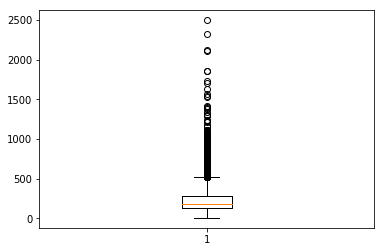

In [10]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

#### Embeddings

Neural networks don’t take raw text as input. Only numeric tensors.

Vectorizing text is the process of transforming text into numeric tensors. This can be done in multiple ways:   
- Segment text into words, and transform each word into a vector.   
- Segment text into characters, and transform each character into a vector.   
- Extract n-grams of words or characters, and transform each n-gram into a vector.   
- Apply categorical transformation: One-hot encoding or word embedding.


*One-hot*   
Words are categorical, they have no ordinal relationship. So they can’t just be numerically encoded.
For each word:  
- Numerically encode each word: {red:0, green:1, blue:2}  
- Generate vector of zeros the length of all possible words/categories  
- Set the index value for the word in the vector  

|red|green|blue|
|-----|-----|-----|
|1|0|0|
|0|1|0|
|0|0|1|

One-hot encoding results in a sparse vector representation (mostly zeros, hi dimensions). Word embeddings provide dense vector representations. Idea is to “embed” word into a lower-dimensionality space.
The dimensions of this space are typically defined by word context, i.e., semantically similar words are embedded near each other.  

Popular word-embedding algorithms:  
- Point-wise mutual information (PMI)  
- Word2Vec: Skip-gram or CBOW  
- GLoVE - Global Vectors for Word Representation  

*Word2Vec*  
CBOW model predict missing word (focus word) using context (surrounding words). Skip gram model predicts context based on the word in focus. Context is a fixed number of words to the left and right of the word in focus. Maximize average log probability of context words co-occurring with focus words.

![Word2Vec](word2vec.png)

One way to understand the concept of embedding is to think of words being embedded in a higher dimensional vector space.

![Vector Space](vector_space.png)

This comes from the deck of slides: http://www.slideshare.net/ChristopherMoody3/word2vec-lda-and-introducing-a-new-hybrid-algorithm-lda2vec-57135994

For our lab, we will use Keras' `Embedding` layer to automatically build SkipGram embeddings for our text collection.

The layer takes arguments that define the mapping including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value that will be seen as an integer). The layer also allows you to specify the dimensionality for each word vector, called the output dimension.

We would like to use a word embedding representation for the IMDB dataset.

If we are only interested in the 5,000 most frequently used words in the dataset, our vocabulary size will be 5,000. We can choose to use a 32-dimension vector to represent each word. Most word vectors are in the 100 to 200 dimension range for general NLP problems.

Embeddings will help us match words by meaning, not just surface form, and help capture word context.

The word embedding representation is a true innovation. We will demonstrate what would have been considered world class results in 2011 with a relatively simple neural network.

The first layer of our model will be an word embedding layer created using the Embedding class as follows:

`Embedding(5000, 32, input_length=500)`

The output of this first layer would be a matrix with the size 32×500 for a given review training or test pattern in integer format.

#### Truncation and padding input examples

We can use the Keras utility `sequence.pad_sequences()` to truncate or pad the dataset to a length of 500 for each observation using the function. Neural network models expect input examples to be the same dimension


#### Keras
The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the  Sequential model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows you to build arbitrary graphs of layers.

Here is the Sequential model:   
```
from keras.models import Sequential
model = Sequential()
```

Stacking layers by using .add():  
```
from keras.layers import Dense
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
```

Once your model looks good, configure its learning process with .compile():  
```
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
```
                            
If you need to, you can further configure your optimizer.   
```
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))
```

You can iterate on your training data in batches:
```
model.fit(x_train, y_train, epochs=5, batch_size=32)
```

More here:   

https://keras.io/  

###  Simple Multi-Layer Perceptron Model 

We can start off by developing a simple multi-layer perceptron (MLP) model with a single hidden layer. MLP's are also called a fully-connected network (FCN). They're "traditional" neural networks.

Let’s start off by importing the classes and functions required for this model and initializing the random number generator to a constant value to ensure we can easily reproduce the results.

In [11]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)

We will limit our vocabulary to the 5,000 most common terms.

In [12]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

We will limit each review length to 500 words. Longer reviews will be truncated. Shorter reviews will use zero-padding.

In [13]:
input_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=input_length)
X_test = sequence.pad_sequences(X_test, maxlen=input_length)

We will start with an embedding size of 32.

The top_words, max_words, and embedding_size are considered `hyperparameters` which require tuning by conducting several iterations of training.

In [14]:
embedding_size = 32

The output of the first embedding layer will be a 32×500 sized tensor.

We will flatten the embedding layer's output to one dimension, then use one dense hidden layer of 250 units with a rectified linear unit (ReLU) activation function. 

ReLU is a common nonlinearity, and is defined by a simple formula:
$$ReLU(z) = max(0, z)$$
Here is its graphical representation (and next to another activation, sigmoid, for comparison):
![](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)

The output layer has one neuron and we will use a sigmoid activation function to output values of 0 and 1 as predictions. If we had to classify more than two values, we would use softmax.

The model uses binary cross-entropy loss:

$$loss = -[y_t * log_2(y_p) + (1 - y_t)*log_2(1-y_p)]$$

and is optimized using the efficient gradient descent based ADAM optimization procedure.

In [15]:
# create the model
model = Sequential()
model.add(Embedding(top_words, embedding_size, input_length=input_length))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In addition to printing out the model summary, there are other ways to visualize our architecture.

Yaml, which stands for "YAML ain't markup language." Seriously. That's what it stands for. YAML will let us read what we've built. It can also be used to automatically define a network.


In [16]:
print(model.to_yaml())

backend: tensorflow
class_name: Sequential
config:
  layers:
  - class_name: Embedding
    config:
      activity_regularizer: null
      batch_input_shape: !!python/tuple [null, 500]
      dtype: float32
      embeddings_constraint: null
      embeddings_initializer:
        class_name: RandomUniform
        config: {maxval: 0.05, minval: -0.05, seed: null}
      embeddings_regularizer: null
      input_dim: 5000
      input_length: 500
      mask_zero: false
      name: embedding_1
      output_dim: 32
      trainable: true
  - class_name: Flatten
    config: {data_format: channels_last, name: flatten_1, trainable: true}
  - class_name: Dense
    config:
      activation: relu
      activity_regularizer: null
      bias_constraint: null
      bias_initializer:
        class_name: Zeros
        config: {}
      bias_regularizer: null
      kernel_constraint: null
      kernel_initializer:
        class_name: VarianceScaling
        config: {distribution: uniform, mode: fan_avg, scale:

We can also generate a graphic. Note: Graphviz and pydot need to be installed.

$ pip install pydot

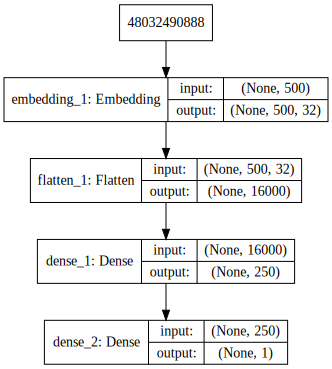

In [17]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='model.png', show_shapes=True)
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

**TODO:**   

Take a moment and try to understand the model you just built and the summary. Note the number of parameters in the model. This relates to the number of weights that have to be learned using back propagation. The larger the number of parameters, the more complex the model. The more complex the model, the longer the training time and a need for larger training sets.


Finally, we can fit the model. We will hold out 10% of the training data for validation. Validation data is used to "test" the model during training to see if our loss decreases and our acccurcy decreases. The model can be re-trained before deployment with all available data.

We've specified 3 epochs, or number of iterations across the training data.

Batch size defines how many examples we show to the network before updating weights using back propagation.

We will perform final evaluation using the held-out test results.

In [18]:
# Fit the model
epochs=3
batch_size=128

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 11s 507us/step - loss: 0.6353 - acc: 0.6123 - val_loss: 0.3964 - val_acc: 0.8240
Epoch 2/3
22500/22500 [==============================] - 12s 526us/step - loss: 0.2537 - acc: 0.8951 - val_loss: 0.2888 - val_acc: 0.8828
Epoch 3/3
22500/22500 [==============================] - 13s 573us/step - loss: 0.1122 - acc: 0.9615 - val_loss: 0.3471 - val_acc: 0.8728
Accuracy: 86.88%


Running this example fits the model and summarizes the estimated performance. We can see that a realtively simple model achieves a score of nearly ~86% which is in the neighborhood of the original paper, with very little effort. And good engineering!

We can plot the accuracy and training loss using the history from training the model. Since we only used 3 training epochs, these graphs will not show much. 10's or 100's of epochs is commong in more complex models.



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


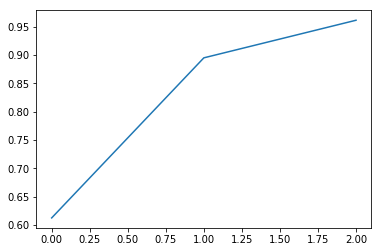

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])


Plot model loss

Text(0.5, 0, 'epoch')

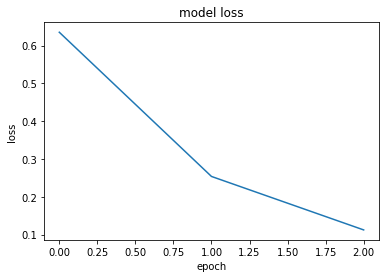

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')


#### TODO:

Generate plots of validation accuracy and loss. Are we underfitting or overfitting?

#### TODO:

I’m sure we can do better. Take a few minutes and experiment with the model and see if you can improve its performance on test accuracy.

You can try adusting any of the hyperparameters: epochs, batch_size, embedding_size, input_length, top_words, the number of nodes (currently 250) in the dense layer, adding another hidden layer, or adding dropout or regularization.

```
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
```

https://keras.io/regularizers/

https://keras.io/layers/core/

https://chrisalbon.com/deep_learning/keras/adding_dropout/

```
model.add(layers.Dropout(0.2))
```

Goldstar to the best model. Report your results below.

## STOP, take a deep breath and wait for instruction before proceeding.

### One-Dimensional Convolutional Neural Network Model 

Convolutional neural networks were designed to honor the spatial structure in image data while being robust to the position and orientation of learned objects in the scene.

This same principle can be used on sequences, such as the one-dimensional sequence of words in a movie review. The same properties that make the CNN model attractive for learning to recognize objects in images can help to learn structure in paragraphs of words, namely the techniques invariance to the specific position of features.

Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

Again, let’s import the classes and functions needed for this example and initialize our random number generator to a constant value so that we can easily reproduce results.

In [21]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import layers
# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)

We can also load and prepare our IMDB dataset as we did before.

In [22]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
input_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=input_length)
X_test = sequence.pad_sequences(X_test, maxlen=input_length)

We can now define our convolutional neural network model. This time, after the Embedding input layer, we insert a `Conv1D` layer. This convolutional layer has `32` feature maps and reads embedded word representations with a filter size (kernel_size) equal to 3. I.e., 3 vector elements of the word embedding at a time.

The convolutional layer is followed by a 1D max pooling layer with a size of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [23]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=input_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# Add a dropout layer for previous hidden layer
model.add(layers.Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
# Add additional convolution layer
#model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total para

We also fit the network the same as before.

In [24]:
# Fit the model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 17s 760us/step - loss: 0.5361 - acc: 0.6932 - val_loss: 0.3044 - val_acc: 0.8760
Epoch 2/3
22500/22500 [==============================] - 16s 692us/step - loss: 0.2351 - acc: 0.9069 - val_loss: 0.2693 - val_acc: 0.8888
Epoch 3/3
22500/22500 [==============================] - 15s 676us/step - loss: 0.1796 - acc: 0.9312 - val_loss: 0.2849 - val_acc: 0.8840
Accuracy: 88.48%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


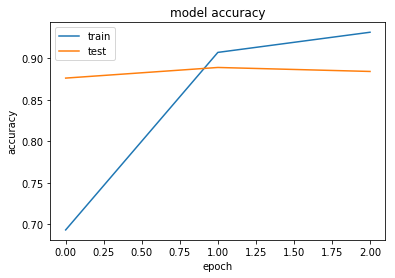

In [25]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

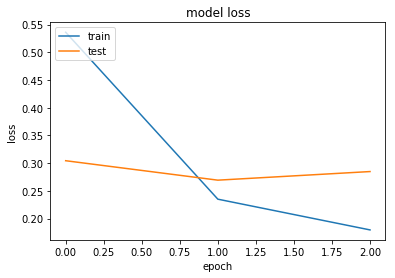

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Running the example, we are first presented with a summary of the network structure. We can see our convolutional layer preserves the dimensionality of our Embedding input layer of 32-dimensional input with a maximum of 500 words. The pooling layer compresses this representation by halving it.

Running the example offers a small but welcome improvement over the neural network model above with an accuracy of ~ 88%!

**TODO:**

It's your turn. See if you can improve the performance of the network by adjusting the hyperparameters, adding additional convolution layers, and playing with dropout.


In [27]:
# Your work here:



## STOP, take a deep breath and wait for instruction before proceeding.

#### LSTM

Below is an example of training an LSTM network.

Notes:  
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.   
- Some configurations won't converge.  
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.


In [28]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 96s 4ms/step - loss: 0.4626 - acc: 0.7803 - val_loss: 0.3982 - val_acc: 0.8264
Epoch 2/15
25000/25000 [==============================] - 94s 4ms/step - loss: 0.2985 - acc: 0.8789 - val_loss: 0.3789 - val_acc: 0.8334
Epoch 3/15
25000/25000 [==============================] - 94s 4ms/step - loss: 0.2172 - acc: 0.9148 - val_loss: 0.4344 - val_acc: 0.8106
Epoch 4/15
25000/25000 [==============================] - 94s 4ms/step - loss: 0.1541 - acc: 0.9439 - val_loss: 0.4674 - val_acc: 0.8320
Epoch 5/15
25000/25000 [==============================] - 94s 4ms/step - loss: 0.1091 - acc: 0.9604 - val_loss: 0.5986 - val_acc: 0.8240
Epoch 6/15
25000/25000 [==============================] - 95s 4ms/step - loss: 0.0800 - acc: 0.971

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


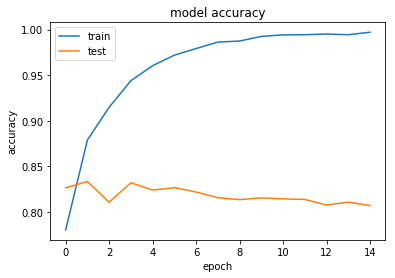

In [29]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

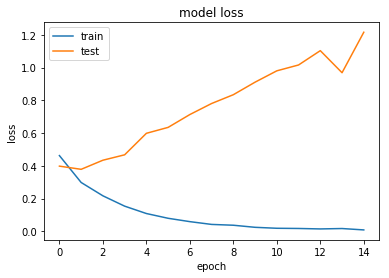

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### TODO:   
Record your results.  

Is the model underfitting or overfitting the data? 

Based on your observations what steps would you take to improve the model?   

Extra credit: Try to actually improve the recurrent model.  
    
    

In [31]:
# SKIP - will come back to this if we have time
# Log to tensorboard
# tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
